# Equation of motion for the rocket

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

# Euler's method to solve this problem

In [84]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [133]:
T = 45.0
dt = 0.1 #the timestep
N = int(T/dt)+1
t = numpy.arange(0.0, T + 0.1, 0.1)

$$u_{n+1} = u_n + \Delta t \,f'(u_n).$$
\begin{align}
h_{n+1} & = h_n + \Delta t \, h'_n \\
v_{n+1} & = v_n + \Delta t \, v'_n.
\end{align}
\begin{align}
v'_n & = {dv}/{dt} = (-(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D)/(m_s+m_p)
\end{align}

\begin{align}
u & = \begin{pmatrix} h \\ v \\
\end{pmatrix}
& f(u) & = \begin{pmatrix} v \\ (-(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D)/(m_s+m_p) \end{pmatrix}.
\end{align}

In [134]:
### initial conditions ###
h0 = 0
v0 = 0
h = numpy.zeros(N)
h[0] = h0
v = numpy.zeros(N)
v[0] = v0
u = numpy.array([h0, v0])

In [135]:
mp = numpy.empty(N)
for i in range(0, len(t)):
    if t[i] <= 5:
        m_pdot = 20.0 # Propellant burn rate in kg/s
        mp[i] = m_pdot
    else:
        m_pdot = 0.0
        mp[i] = m_pdot

In [136]:
# model parameters:
m_s = 50.0 #weight of the rocket shell in kg
g = 9.81 #gravity in m s^{-2}
rho = 1.091 #average air density in kg m^{-3}
r = 0.5 #radius of the rocket in m
A = math.pi * r**2 # maximum cross sectional area of the rocket
v_e = 325.0 #exhaust speed in m/s
C_D = 0.15 #drag coefficient
m_p0 = 100.0 #initial weight of the rocket propellent
m_p = m_p0 - t*mp

In [137]:
#time-loop using Euler's method
for n in range(1, N):
    u = u + dt*numpy.array([u[1], (-(m_s + m_p[n])*g + mp[n]*v_e - 0.5*rho*u[1]*abs(u[1])*A*C_D)/(m_s + m_p[n])])
    h[n] = u[0]
    v[n] = u[1]

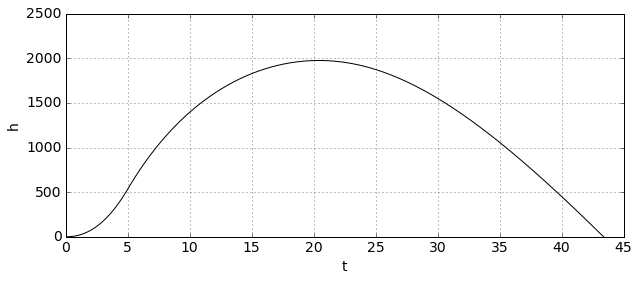

In [138]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.grid(True)
pyplot.ylim(0,2500)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('h', fontsize=14) #y label
pyplot.plot(t,h, 'k-');

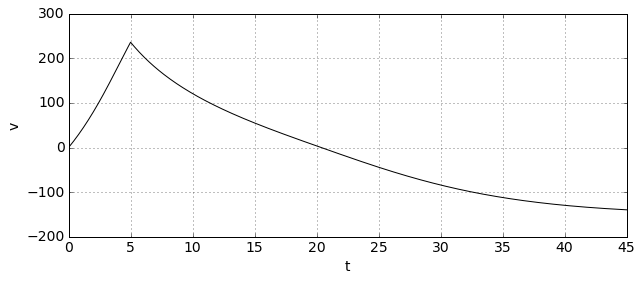

In [139]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.grid(True)
pyplot.ylim(-200,300)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('v', fontsize=14) #y label
pyplot.plot(t,v, 'k-');

In [140]:
max(h)

1974.938985341314

In [141]:
max(v)

235.89718920415191

In [142]:
for n in range(N):
    if h[n] == max(h):
        print("t = %.*f" % (2,dt*n))

t = 20.40


In [143]:
for n in range(N):
    if v[n] == max(v):
        print("t= %.*f" % (2,dt*n))

t= 5.00


In [144]:
for n in range(N):
    if h[n] <= 0.0:
        print("t= %.*f" % (2,dt*n))

t= 0.00
t= 0.10
t= 43.40
t= 43.50
t= 43.60
t= 43.70
t= 43.80
t= 43.90
t= 44.00
t= 44.10
t= 44.20
t= 44.30
t= 44.40
t= 44.50
t= 44.60
t= 44.70
t= 44.80
t= 44.90
t= 45.00


In [145]:
v[43.4/dt]

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


-136.74707572420144